In [10]:
import os
import sys

import pyaudio
import wave
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import pylab
import sounddevice as sd

In [114]:
# This records an audio file
CHUNK = 512
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 1
RATE = 44100 #sample rate
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "pyaudio-output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):

    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [115]:
#open a wav format music and play it
f = wave.open(r"file.wav","rb")  
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  
data = f.readframes(CHUNK)  

#play stream wav file 
while data:  
    stream.write(data)  
    data = f.readframes(CHUNK)  

#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate()  

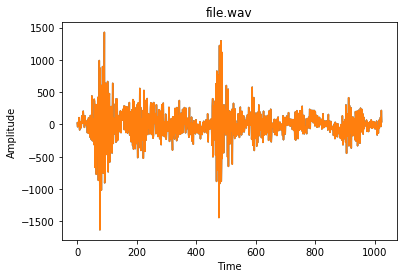

In [141]:
# Plot amps over time
# read audio samples
input_data = read("file.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("file.wav")
# display the plot
plt.show()

In [142]:
print(audio.shape)

(220160, 2)


In [143]:
# print(audio[0:1,0])

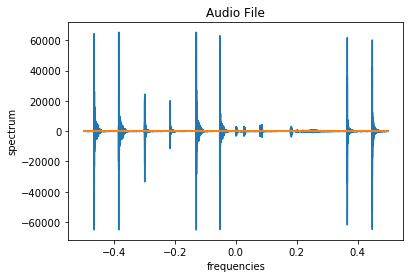

In [144]:
# Plot Spectrum over Freq
spectrum = np.fft.fft(audio)
frequencies = np.fft.fftfreq(len(spectrum))
pylab.plot(frequencies,spectrum)
pylab.xlabel('frequencies')
pylab.ylabel('spectrum')
pylab.title('Audio File')
pylab.show()

In [145]:
print(frequencies.shape)

(220160,)


In [146]:
#To Do
#Is frequency the metric for identifying if an audio clip has sound or is silent
#Set threshold
#if frequency is > threshold 
#the their is noise and we want to print("True") and return 
### audio snippets funciton 
from scipy.io.wavfile import write
def audio_snippets(file_name,audio,threshold=250,amplitude=3,test_threshold=True):
    db = np.fft.fft(audio)
    h=np.where(spectrum[:,0]>threshold)[0]
    h_diff = h[1:]-h[:-1]
    avg_df = np.average(h_diff)
    std_df = np.std(h_diff)

    h_diff_marker = np.where(h_diff>avg_df+3*std_df)

    intervals = h[np.array(h_diff_marker)-1]
    count=0
    created_files = []
    for i in range(len(intervals[0])):
        if i==0:
            intv_aud = audio[:intervals[0][0],:]
        elif (i+1< len(intervals[0])):
            intv_aud =audio[intervals[0][i-1]:intervals[0][i],:]
        else:
            intv_aud =audio[intervals[0][i]:,:]
        if np.amax(intv_aud) < amplitude*threshold:
                continue
        count+=1
        wave_file = '%s-%s.wav'%(file_name,count)
        created_files.append(wave_file)
        write(wave_file, 44100,intv_aud)
        if test_threshold:
            f = wave.open(wave_file,"rb")  
            #instantiate PyAudio  
            p = pyaudio.PyAudio()  
            #open stream  
            stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                            channels = f.getnchannels(),  
                            rate = f.getframerate(),  
                            output = True)  
            #read data  
            data = f.readframes(CHUNK)  

            #play stream wav file 
            while data: 
                stream.write(data)  
                data = f.readframes(CHUNK) 


        #stop stream  
        stream.stop_stream()  
        stream.close()  
   
        #close PyAudio  
        p.terminate() 
    # return all files created
    return created_files
audio_snippets('new_audio',audio,threshold=150,amplitude=15)


['new_audio-1.wav',
 'new_audio-2.wav',
 'new_audio-3.wav',
 'new_audio-4.wav',
 'new_audio-5.wav',
 'new_audio-6.wav',
 'new_audio-7.wav',
 'new_audio-8.wav']

In [154]:
### TEST THRESHOLD WITH ONE OF THE FILES ABOVE
f = wave.open('new_audio-8.wav',"rb")  
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  
data = f.readframes(CHUNK)  

#play stream wav file 
while data: 
    stream.write(data)  
    data = f.readframes(CHUNK) 


#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate() 